In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE

In [2]:
# Load data
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')  # 0=malignant, 1=benign

In [3]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [4]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Fit PCA on training data
pca = PCA(n_components=None)  # Keep all components for analysis
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [6]:
# Explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [4.44134918e-01 1.89446183e-01 9.54335633e-02 6.72468941e-02
 5.51769040e-02 3.93453424e-02 2.18176591e-02 1.58331722e-02
 1.27878330e-02 1.14544250e-02 9.26269214e-03 8.47428916e-03
 7.99746679e-03 5.30706257e-03 3.12250212e-03 2.57146110e-03
 2.03925720e-03 1.86696858e-03 1.49100638e-03 1.03671459e-03
 9.25703045e-04 8.66421035e-04 7.19778970e-04 5.88332657e-04
 5.04652748e-04 2.45507775e-04 2.16103111e-04 5.71732867e-05
 2.57352579e-05 4.27774949e-06]


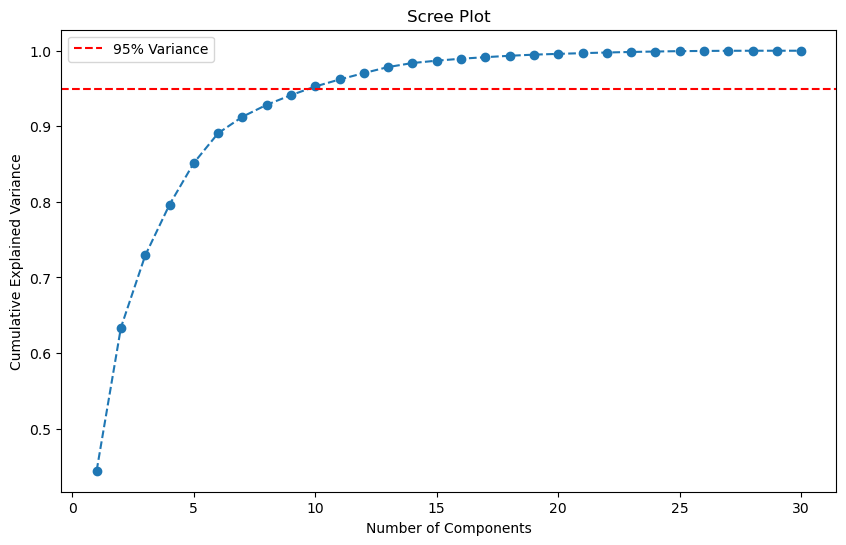

In [7]:
# Scree Plot (Variance Explained)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), 
         marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()
plt.show()

In [8]:
# Reduce Dimensionality
pca = PCA(n_components=2)  # For visualization (or use n_components=10 for 95% variance)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

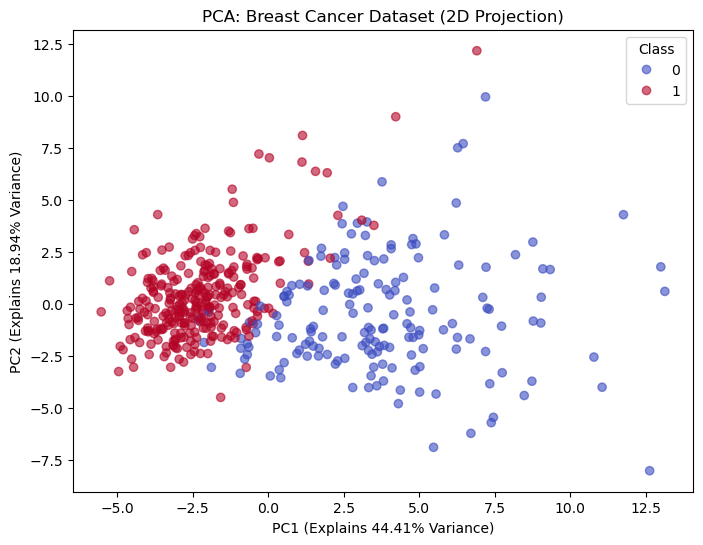

In [9]:
# Visualize PCA-Transformed Data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm', alpha=0.6)
plt.xlabel("PC1 (Explains {:.2f}% Variance)".format(pca.explained_variance_ratio_[0] * 100))
plt.ylabel("PC2 (Explains {:.2f}% Variance)".format(pca.explained_variance_ratio_[1] * 100))
plt.title("PCA: Breast Cancer Dataset (2D Projection)")
plt.legend(*scatter.legend_elements(), title="Class")
plt.show()

In [10]:
# Apply LDA
# LDA reduces to (n_classes - 1) components (here: 1D)
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

In [11]:
# Create DataFrames for train and test
lda_train_df = pd.DataFrame({
    'LDA Component 1': X_train_lda.flatten(),
    'Class': y_train.map({0: 'Malignant', 1: 'Benign'}),
    'Dataset': 'Train'  # Label for train data
})

lda_test_df = pd.DataFrame({
    'LDA Component 1': X_test_lda.flatten(),
    'Class': y_test.map({0: 'Malignant', 1: 'Benign'}),
    'Dataset': 'Test'  # Label for test data
})

In [12]:
# Plot Train vs. Test Distributions
plt.figure(figsize=(10, 6))
sns.histplot(
    data=lda_combined_df,
    x='LDA Component 1',
    hue='Class',
    element='step',
    kde=True,
    palette='coolwarm',
    alpha=0.6,
    bins=30,
    common_norm=False,  # Normalize each distribution separately
    hue_order=['Malignant', 'Benign']  # Ensure consistent order
)
plt.title("LDA: Class Separation (Train + Test)")
plt.show()

NameError: name 'lda_combined_df' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Transform test data (using PCA fitted on training data)
X_test_pca = pca.transform(X_test_scaled)  # No fit_transform()!

# Create DataFrames for train and test
pca_train_df = pd.DataFrame({
    'PC1': X_train_pca[:, 0],
    'PC2': X_train_pca[:, 1],
    'Class': y_train.map({0: 'Malignant', 1: 'Benign'}),
    'Dataset': 'Train'
})

pca_test_df = pd.DataFrame({
    'PC1': X_test_pca[:, 0],
    'PC2': X_test_pca[:, 1],
    'Class': y_test.map({0: 'Malignant', 1: 'Benign'}),
    'Dataset': 'Test'
})

# Combine DataFrames
pca_combined_df = pd.concat([pca_train_df, pca_test_df])

In [ ]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=pca_combined_df,
    x='PC1',
    y='PC2',
    hue='Class',
    style='Dataset',  # Different markers for train/test
    palette='coolwarm',
    alpha=0.8,
    s=80
)
plt.title("PCA: Train vs. Test Data (2D Projection)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=lda_combined_df,
    x='Class',
    y='LDA Component 1',
    hue='Dataset',
    palette='pastel'
)
plt.title("LDA Component Distribution: Train vs. Test")
plt.show()

In [ ]:
# PCA + Logistic Regression
lr_pca = LogisticRegression(max_iter=1000)
lr_pca.fit(X_train_pca, y_train)
y_pred_pca = lr_pca.predict(X_test_pca)
print("PCA + Logistic Regression:\n", classification_report(y_test, y_pred_pca))

In [ ]:
# LDA + Logistic Regression (LDA already does classification, but we can use its features)
lr_lda = LogisticRegression(max_iter=1000)
lr_lda.fit(X_train_lda, y_train)
y_pred_lda = lr_lda.predict(X_test_lda)
print("LDA + Logistic Regression:\n", classification_report(y_test, y_pred_lda))

In [ ]:
# PCA + SVC
svc_pca = SVC(kernel='rbf', C=10, gamma='scale')
svc_pca.fit(X_train_pca, y_train)
y_pred_svc_pca = svc_pca.predict(X_test_pca)
print("PCA + SVC:\n", classification_report(y_test, y_pred_svc_pca))

In [ ]:
# LDA + SVC
svc_lda = SVC(kernel='linear', C=10)  # LDA already linear, so linear kernel is sufficient
svc_lda.fit(X_train_lda, y_train)
y_pred_svc_lda = svc_lda.predict(X_test_lda)
print("LDA + SVC:\n", classification_report(y_test, y_pred_svc_lda))